This notebook gives a solution to identify fake and real news of a large data(set) with highest possible accuracy.

In [ ]:
#import all the essential libraries

import numpy as np 
import pandas as pd
import tensorflow as tf
from nltk.corpus import stopwords           #for using stopwords
from nltk.stem.porter import PorterStemmer  # for stemming

In [36]:
#import the csv into true and false

true = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')

In [37]:
#true.head shows the first five rows ,so the colum details can be studied,same is done with false (false.head)
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [44]:
#add a column called category that assigns '0' for fake news and '1' for true news
true['category'] = 1
fake['category'] = 0

In [45]:
#true.news to check if the category column is added
true.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [46]:
#concatenate true and false into dataframe 'df'
df = pd.concat([true,fake])

In [47]:
#display df
df


,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [48]:
#set category column as the target and convert to a numpy array 
target = df['category'].values
target = np.array(target, dtype='int64')

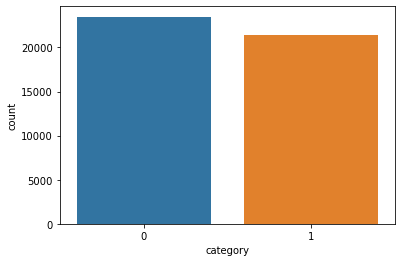

In [33]:
#import seaborn for visualising the data 
import seaborn as sns
sns.countplot(x='category',data=df)

The data is fairly distributed b/w true and false , thus contributing to a non-biased model making

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

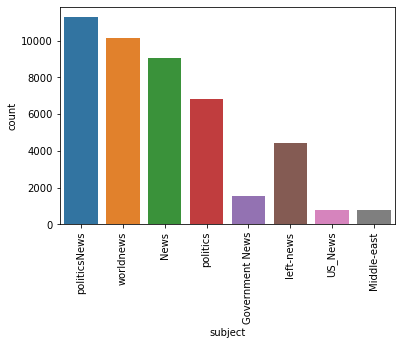

In [53]:
#observe which subjects/topics contribute to most news in data
ax=sns.countplot(x='subject',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


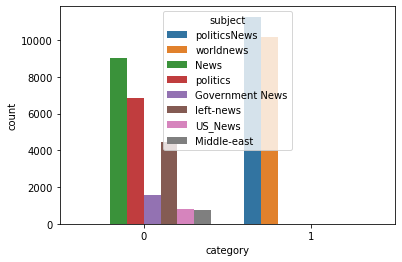

In [54]:
# we study which subjects/topics contribute to most fake and true news
sns.countplot(x='category',hue='subject',data=df)

 create a function clean_word that replaces punctuation with blank spaces, and appends only numbers and alphabets to 'new', excluding stopwords, and perform steeming and append the words to'new'..

In [ ]:
#import stopwords, porter stemmer(for stemming)

STOPWORDS = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_word(word_list):
    global STOPWORDS
    global stemmer
    new = []
    for word in word_list:
        word = word.replace('.', '')
        word = word.replace(',', '')
        word = word.replace(';', '')
        word = word.lower()
        if (word.isalpha() or word.isdigit()) and word not in STOPWORDS:   
            new.append(stemmer.stem(word.strip()))
    return new

In [ ]:
# add columns 'text', 'title' and 'subject' to text ,and leave spaces b/w so as to easily feed into the model
df['text'] = df['text'] + " " + df['title'] + " " + df['subject']
df = df.drop(columns=['title','subject','date']) #drop columns that might not contribute to the prediction of target

In [ ]:
from sklearn.preprocessing import LabelEncoder

text = df['text'].values

# Tokenize each sentence 
text_arr = [row.split(' ') for row in text]

In [ ]:
vocab = []
clean_text_array = []
for row in text_arr:
    clean_row = clean_word(row)
    clean_text_array.append(clean_row)
    vocab.extend(clean_row)

In [34]:
#set and list all the words to vocabulary and print the length(to get a count of the number of words)
vocabulary = list(set(vocab))
len(vocabulary)

130590

In [ ]:

vectorizer = LabelEncoder()
vectorizer.fit(vocabulary)
print(1)

# Create token vector using Label Encoder fit on entire vocabulary
token_vector = []
i=0

# declare max_words to keep count of the longest sentence vectorized
# we need this to pad every other vector to same length as longest vector

max_words = 0 
for row in clean_text_array:
    encoded = vectorizer.transform(row).tolist()
    print(i)
    i+=1
    size = len(encoded)
    if size>max_words: 
        max_words=size
    token_vector.append(encoded)

In [ ]:
# save the token_vector to a file so it can be uploaded next time (mainly because it takes 100 minutes or so)
import os
os.chdir(r'/kaggle/working')
f=open('f1.txt','w')
for ele in token_vector:
    f.write(ele+"\n")
f.close()

In [19]:
max_words #print max_words

4676

In [20]:
# pad each sentence with zeros to the length of the longest sentence
padded = []
for row in token_vector:
    r = np.pad(row, (0, max_words-len(row)), 'constant')
    padded.append(r)

In [21]:
# all padded sentences to example vector

ex_vector = np.array(padded)

In [22]:
# split train and test data into 80:20, data=ex_vector, target=target

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(ex_vector,target, test_size=0.2)

In [23]:
import tensorflow as tf

split the data into batches and shuffle 

In [24]:

train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((xtest, ytest))

In [25]:

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [26]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [27]:
from tensorflow import keras  


In [28]:
embedding_dim=16 

# defining the sequential model with an Embedding layer
# Add a Global Average Pooling 1D layer to flattent the matrix into vector

model = keras.models.Sequential([
  keras.layers.Embedding(130590, embedding_dim), #130590 as input based on vocabulary
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])


In [29]:
#complie the model
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [30]:
epochs=5                  #five iterations
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=2)

Train for 562 steps, validate for 141 steps
Epoch 1/5
562/562 - 24s - loss: 0.6389 - accuracy: 0.6542 - val_loss: 0.4613 - val_accuracy: 0.9280
Epoch 2/5
562/562 - 23s - loss: 0.2949 - accuracy: 0.9399 - val_loss: 0.1976 - val_accuracy: 0.9625
Epoch 3/5
562/562 - 24s - loss: 0.1621 - accuracy: 0.9646 - val_loss: 0.1294 - val_accuracy: 0.9728
Epoch 4/5
562/562 - 23s - loss: 0.1138 - accuracy: 0.9750 - val_loss: 0.1005 - val_accuracy: 0.9766
Epoch 5/5
562/562 - 24s - loss: 0.0863 - accuracy: 0.9812 - val_loss: 0.0816 - val_accuracy: 0.9805


In [ ]:
just typing random stuff so the notebook doesnt collapse due to idleness
1 2 3 4 5 6 lkdaldlkaldkakdkd
lkslkslakslksal
dlllllllll
sjffffffffffff
lsljslsl
xa,xm,xa,mx,axma/a/
kalkxslxljl
kLSLls